In [100]:
# importing necessary libraries

import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
#reading the dataset
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')

In [66]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [67]:
# dropping irrelevant columns
df.drop(columns=['Unnamed: 0'], axis = 1 ,inplace = True)

In [68]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [69]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [70]:
# replacing missing values with spaces
df.fillna(' ', inplace = True)

In [71]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

## Distribution of Fake and Legit News

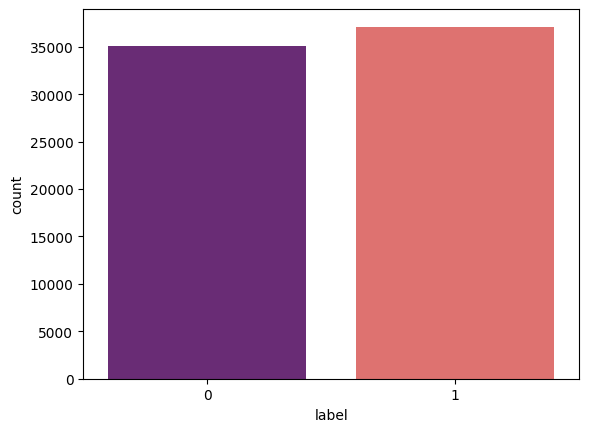

In [111]:
sns.countplot(x = 'label', data = df,palette = 'magma')
plt.show()

## Stemming

removing the stopwords(i, is , the, for ,in etc) converting all words into lower case and into their root words
-  Playing => Play

In [76]:
portStemmer=PorterStemmer()

In [77]:
def stemming(content):
    content = str(content)
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [portStemmer.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [78]:
# stemming the title column
df['title']=df['title'].apply(stemming)

In [79]:
df['title'].head(5)

0    law enforc high alert follow threat cop white ...
1                                                     
2    unbeliev obama attorney gener say charlott rio...
3    bobbi jindal rais hindu use stori christian co...
4    satan russia unv imag terrifi new supernuk wes...
Name: title, dtype: object

In [82]:
df.drop(columns=('text'),inplace=True)

In [83]:
df.head()

,title,label
0,law enforc high alert follow threat cop white ...,1
1,,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1


## Segregating feature and Target

In [85]:
X=df['title'].values
y=df['label'].values

## Converting the textual data into Numeric(Vectors)

In [86]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [87]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 629110 stored elements and shape (72134, 19639)>
  Coords	Values
  (0, 19106)	0.19134939529376566
  (0, 18648)	0.1297506867782943
  (0, 17363)	0.2542650376115143
  (0, 17260)	0.24871262252022117
  (0, 9699)	0.22829788917209384
  (0, 7887)	0.26746434949988324
  (0, 6730)	0.48553136502134386
  (0, 6425)	0.28932771754845743
  (0, 5509)	0.31820565801047196
  (0, 3679)	0.24871262252022117
  (0, 1802)	0.33473541566384035
  (0, 407)	0.3190180925014663
  (2, 18648)	0.13443733492985524
  (2, 18034)	0.35962437110547785
  (2, 16446)	0.1999703023632961
  (2, 15094)	0.1609967301122813
  (2, 14591)	0.3580030298678158
  (2, 13591)	0.22687620695463123
  (2, 12744)	0.27904818164471595
  (2, 12011)	0.16878852994653004
  (2, 11864)	0.2231406266784195
  (2, 8020)	0.2692285294185893
  (2, 6880)	0.2652283770602196
  (2, 2919)	0.3639616996972358
  (2, 2673)	0.30809679188606154
  :	:
  (72130, 1768)	0.49293214478810593
  (72130, 764)	0.398703804077

## Train Test split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

## Logistic Regression Model

In [90]:
lr = LogisticRegression()

In [91]:
lr.fit(X_train,y_train)

LogisticRegression()

## Evaluating Accuracy

In [93]:
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)

In [94]:
accuracy

0.896166909267346

## Confusion Matrix

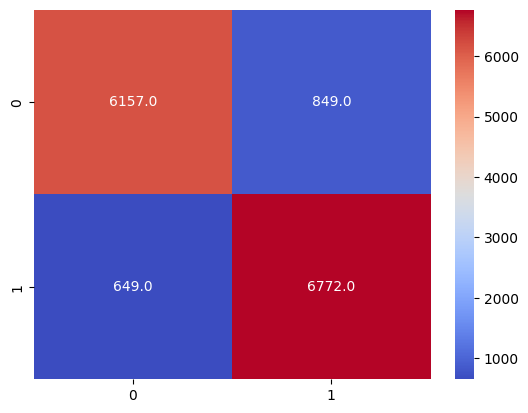

In [108]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'coolwarm',fmt = '.1f')
plt.show()

## F1 and Recall

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7006
           1       0.89      0.91      0.90      7421

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



In [96]:
X_new=X_test[45]
prediction=lr.predict(X_new)
print(prediction)

if (prediction==0):
    print('The news is fake')
else:
    print('The news is real')

[0]
The news is fake


In [99]:
print(y_test[45])

0
